In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/twz18/Downloads/Spam Email raw text for NLP.csv")
df

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [2]:
df.head()

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6


In [3]:
def replacement(df, col):
    df[col] = df[col].str.replace(r'<[^<>]*>', '', regex=True)
    df[col] = df[col].str.replace(r'http', '', regex=True)
    df[col] = df[col].str.replace(r'[^A-Za-z0-9(),!?@\'\`\"\_\n]', '', regex=True)
    df[col] = df[col].str.replace(r'\n', '', regex=True)
    df[col] = df[col].str.lower()
    return df

In [4]:
df = replacement(df, 'MESSAGE')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


In [6]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twz18\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\twz18\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\twz18\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
import string
import re
clear = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

In [8]:
def lemm(text):
    repunc = re.sub(clear, ' ', text)
    nonstop = [j for j in repunc if j not in set(stopwords.words('english'))]
    lem = WordNetLemmatizer()
    return "".join([lem.lemmatize(j) for j in nonstop])

In [9]:
df['MESSAGE'] = df['MESSAGE'].apply(lemm)

In [10]:
corpus = df['MESSAGE'].tolist()

In [11]:
df['MESSAGE']

0       erhewner,nererereherlwepnn40er!wehelpufnhebere...
1       ennhufrllcpueruer!!!newpeclpckgeel!nrnewrk2002...
2       hulpregenefr_nexpr_000_1cc19_01c253664b57f30cn...
3       prnnfrnhenewnnerefnllvlblehegenerlpublccunprce...
4       hheblnefucngvewc'frfreepeple(lke80100nnenh)nhe...
                              ...                        
5791    'nefhe30,000bu'nwrkngverwellhweekwhheeupenerve...
5792    enrnquew3cpprvehl4'eg'nwu'llbeblewhfeelngfrher...
5793    nn,200207220650,chewrehhecrreclnebeeurcelfrher...
5794    nceupne,nfrewrewullkenllrpelfhveregehenfrnbvng...
5795    furunpck,nhenuehe"newfc"bunhwnlheegeelecebpck,...
Name: MESSAGE, Length: 5796, dtype: object

In [27]:
### this step is to save the dataframe into csv file as the above algorithm process too long
df.to_csv("NLP.csv", encoding='utf-8')

In [2]:
import pandas as pd
df = pd.read_csv("NLP.csv")

In [3]:
df = df.iloc[:, 1:]

In [7]:
corpus = df['MESSAGE'].tolist()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf.fit_transform(df['MESSAGE'].values.astype('U'))
y = df["CATEGORY"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
import seaborn as sns

In [15]:
import xgboost as xg
classifierXg = xg.XGBClassifier()
classifierXg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [18]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [20]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [21]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors=2)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 90)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=90)

In [31]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)

BaggingClassifier()

In [24]:
def report(model_name, X_test, y_test, model):
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    acc = accuracy_score(y_pred, y_test)
    report = classification_report(y_test, y_pred)
    print(report)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True)
    print("Accuracy of " + model_name + " Model:", acc*100,"%")

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       798
           1       0.96      0.63      0.76       362

    accuracy                           0.88      1160
   macro avg       0.91      0.81      0.84      1160
weighted avg       0.89      0.88      0.87      1160

Accuracy of XGBoost Model: 87.58620689655172 %


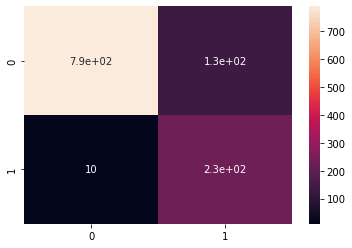

In [25]:
report("XGBoost (Boosting)", X_test, y_test, classifierXg)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       798
           1       0.89      0.51      0.65       362

    accuracy                           0.83      1160
   macro avg       0.85      0.74      0.77      1160
weighted avg       0.84      0.83      0.81      1160

Accuracy of lightgbm Model: 82.67241379310344 %


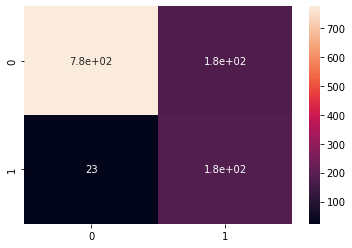

In [26]:
report("lightgbm", X_test, y_test, classifier)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       798
           1       0.98      0.76      0.86       362

    accuracy                           0.92      1160
   macro avg       0.94      0.88      0.90      1160
weighted avg       0.93      0.92      0.92      1160

Accuracy of KNN Model: 92.06896551724138 %


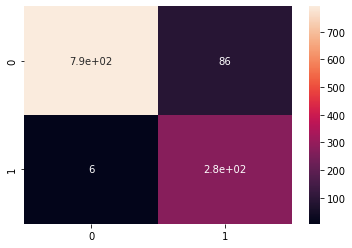

In [27]:
report("KNN", X_test, y_test, classifierKNN)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       798
           1       0.99      0.59      0.74       362

    accuracy                           0.87      1160
   macro avg       0.92      0.79      0.83      1160
weighted avg       0.89      0.87      0.86      1160

Accuracy of Naive Bayes Model: 86.98275862068967 %


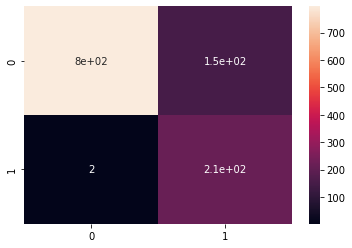

In [28]:
report("Naive Bayes", X_test, y_test, NB)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       798
           1       0.96      0.76      0.85       362

    accuracy                           0.91      1160
   macro avg       0.93      0.87      0.89      1160
weighted avg       0.92      0.91      0.91      1160

Accuracy of Decision Tree Model: 91.46551724137932 %


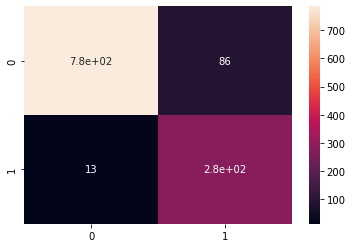

In [29]:
report("Decision Tree", X_test, y_test, dt)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       798
           1       0.98      0.72      0.83       362

    accuracy                           0.91      1160
   macro avg       0.93      0.86      0.88      1160
weighted avg       0.92      0.91      0.90      1160

Accuracy of Random Forest Model: 90.77586206896552 %


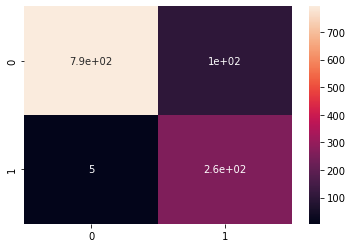

In [30]:
report("Random Forest", X_test, y_test, rf)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       798
           1       0.96      0.70      0.81       362

    accuracy                           0.90      1160
   macro avg       0.92      0.85      0.87      1160
weighted avg       0.91      0.90      0.89      1160

Accuracy of Bagging Model: 89.91379310344828 %


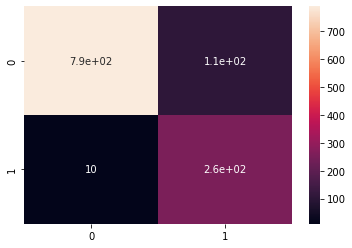

In [32]:
report('Bagging', X_test, y_test, bagging)